# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 12.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
214907,0.0366,0.1221,0.0024,0.0024,0.0024,0.0024,0.0024,0.1416,0.0024,0.0854,0,0,0,0
309658,0.1758,0.0024,0.0024,0.0317,0.0024,0.0269,0.3076,0.7202,0.1172,0.1855,3,3,8,8
335282,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0195,0.0586,0.0024,0.0024,2,0,11,0
318726,0.0366,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0708,0.0024,0.0269,0,0,0,0
365392,0.0757,0.0024,0.0073,0.0708,0.0024,0.0024,0.1465,0.8105,0.0635,0.3442,6,6,14,14


In [3]:
raw_data.shape

(460382, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460382 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          460382 non-null  float64
 1   Emg2          460382 non-null  float64
 2   Emg3          460382 non-null  float64
 3   Emg4          460382 non-null  float64
 4   Emg5          460382 non-null  float64
 5   Emg6          460382 non-null  float64
 6   Emg7          460382 non-null  float64
 7   Emg8          460382 non-null  float64
 8   Emg9          460382 non-null  float64
 9   Emg10         460382 non-null  float64
 10  repetition    460382 non-null  int64  
 11  rerepetition  460382 non-null  int64  
 12  stimulus      460382 non-null  int64  
 13  restimulus    460382 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000
mean,0.228323,0.149005,0.158937,0.051782,0.009471,0.009314,0.118619,0.383167,0.090241,0.158943,3.201413,2.333123,5.674920,4.168397
std,0.386383,0.289871,0.354328,0.167727,0.031863,0.031848,0.278554,0.484126,0.287058,0.150671,3.487234,3.297521,6.590112,6.223571
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041500,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.102500,0.002400,0.031700,0.000000,0.000000,0.000000,0.000000
50%,0.087900,0.034200,0.002400,0.002400,0.002400,0.002400,0.048800,0.214800,0.002400,0.141600,2.000000,0.000000,3.000000,0.000000
75%,0.214800,0.161100,0.153800,0.007300,0.002400,0.002400,0.127000,0.505400,0.034200,0.239300,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.668000,4.663100,4.665500,1.171900,0.778800,4.665500,4.668000,4.663100,2.878400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     192400
4      15502
7      15495
12     15491
8      15487
2      15486
11     15469
9      15465
6      15448
5      15447
3      15425
1      15417
10     15406
14     10334
13     10332
17     10332
15     10293
16     10255
19      5172
18      5169
21      5169
23      5133
20      5130
22      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

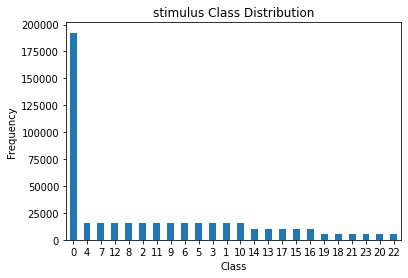

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
395400,0.1318,0.0269,0.0049,0.0024,0.0024,0.0122,0.2026,0.2148,0.0024,0.0024,10,10,17,17
450546,0.0220,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0391,0.0024,0.0024,0,0,0,0
354134,0.0684,0.0024,0.0024,0.0024,0.0024,0.0024,0.0781,0.0732,0.0098,0.0049,3,3,13,13
285102,0.3442,0.0049,0.0024,0.0024,0.0024,0.0024,0.0903,0.1709,0.0024,0.0244,0,0,0,0
89359,0.6323,0.9155,0.4614,0.0122,0.0024,0.0024,0.1270,1.0547,0.0293,0.2173,7,7,11,11


In [12]:
raw_data.shape

(380069, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380069 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          380069 non-null  float64
 1   Emg2          380069 non-null  float64
 2   Emg3          380069 non-null  float64
 3   Emg4          380069 non-null  float64
 4   Emg5          380069 non-null  float64
 5   Emg6          380069 non-null  float64
 6   Emg7          380069 non-null  float64
 7   Emg8          380069 non-null  float64
 8   Emg9          380069 non-null  float64
 9   Emg10         380069 non-null  float64
 10  repetition    380069 non-null  int64  
 11  rerepetition  380069 non-null  int64  
 12  stimulus      380069 non-null  int64  
 13  restimulus    380069 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.5 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 82.85315862867367


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37518
           1       0.78      0.78      0.78      2216
           2       0.74      0.73      0.74      2231
           3       0.77      0.76      0.77      2098
           4       0.72      0.73      0.72      2142
           5       0.73      0.76      0.74      2303
           6       0.80      0.78      0.79      2161
           7       0.70      0.72      0.71      2362
           8       0.77      0.76      0.77      2236
           9       0.74      0.74      0.74      2288
          10       0.73      0.72      0.73      2451
          11       0.75      0.75      0.75      2048
          12       0.64      0.65      0.65      2126
          13       0.69      0.71      0.70      1397
          14       0.67      0.68      0.67      1285
          15       0.68      0.69      0.68      1381
          16       0.72      0.72      0.72      1373
 

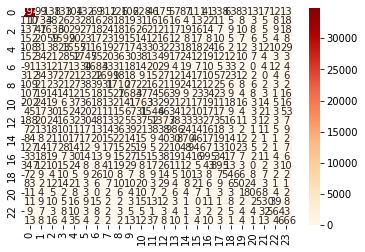

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.335425053279659
MSE: 15.465243244665457
RMSE: 3.932587347366293


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8288812518055906
Recall Score :  0.8285315862867366
f1_score :  0.8286722423672265


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 90.27152892888152


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     37518
           1       0.89      0.89      0.89      2216
           2       0.87      0.86      0.86      2231
           3       0.88      0.87      0.87      2098
           4       0.86      0.85      0.85      2142
           5       0.86      0.85      0.86      2303
           6       0.93      0.91      0.92      2161
           7       0.80      0.78      0.79      2362
           8       0.91      0.91      0.91      2236
           9       0.89      0.88      0.88      2288
          10       0.87      0.84      0.85      2451
          11       0.91      0.91      0.91      2048
          12       0.83      0.85      0.84      2126
          13       0.85      0.87      0.86      1397
          14       0.81      0.81      0.81      1285
          15       0.76      0.77      0.77      1381
          16       0.92      0.89      0.90      1373
 

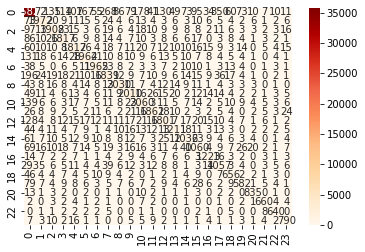

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.8235325071697319
MSE: 10.017365222195911
RMSE: 3.1650221519281523


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9022964444916968
Recall Score :  0.9027152892888152
f1_score :  0.9024211945739964


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.210829584024


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37518
           1       0.91      0.89      0.90      2216
           2       0.93      0.84      0.88      2231
           3       0.94      0.85      0.89      2098
           4       0.89      0.86      0.88      2142
           5       0.90      0.86      0.88      2303
           6       0.93      0.89      0.91      2161
           7       0.85      0.79      0.82      2362
           8       0.91      0.89      0.90      2236
           9       0.90      0.86      0.88      2288
          10       0.91      0.83      0.87      2451
          11       0.92      0.90      0.91      2048
          12       0.86      0.79      0.82      2126
          13       0.89      0.85      0.87      1397
          14       0.87      0.77      0.81      1285
          15       0.77      0.82      0.80      1381
          16       0.91      0.86      0.88      1373
 

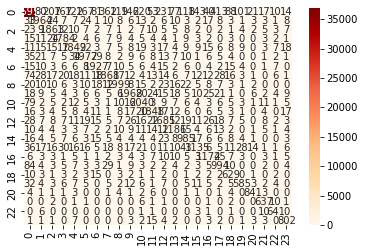

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7321677585707896
MSE: 8.786420922461652
RMSE: 2.9641897581736654


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9113243091588566
Recall Score :  0.91210829584024
f1_score :  0.9103976554635272


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[19:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.18470281790196


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     37518
           1       0.89      0.88      0.89      2216
           2       0.88      0.84      0.86      2231
           3       0.91      0.85      0.88      2098
           4       0.86      0.84      0.85      2142
           5       0.86      0.84      0.85      2303
           6       0.92      0.88      0.90      2161
           7       0.82      0.78      0.80      2362
           8       0.89      0.89      0.89      2236
           9       0.88      0.86      0.87      2288
          10       0.87      0.83      0.85      2451
          11       0.89      0.89      0.89      2048
          12       0.82      0.79      0.80      2126
          13       0.85      0.84      0.84      1397
          14       0.81      0.75      0.78      1285
          15       0.76      0.79      0.78      1381
          16       0.88      0.85      0.86      1373
 

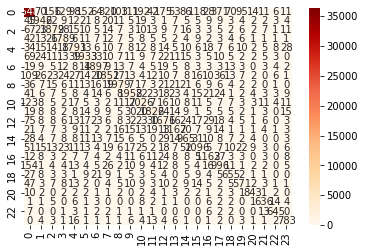

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.7921303970321256
MSE: 9.400492014628885
RMSE: 3.0660221810399357


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9002748766600798
Recall Score :  0.9018470281790196
f1_score :  0.9006003739249315


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.55681848080617


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37518
           1       0.92      0.90      0.91      2216
           2       0.95      0.84      0.89      2231
           3       0.95      0.85      0.90      2098
           4       0.91      0.87      0.89      2142
           5       0.92      0.86      0.89      2303
           6       0.95      0.89      0.92      2161
           7       0.85      0.79      0.82      2362
           8       0.92      0.90      0.91      2236
           9       0.90      0.86      0.88      2288
          10       0.92      0.83      0.87      2451
          11       0.94      0.91      0.92      2048
          12       0.88      0.80      0.84      2126
          13       0.92      0.86      0.89      1397
          14       0.88      0.78      0.82      1285
          15       0.78      0.82      0.80      1381
          16       0.94      0.87      0.90      1373
 

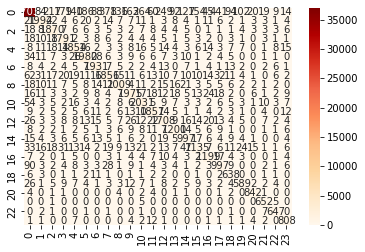

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.7224721761780725
MSE: 8.732049359328546
RMSE: 2.9550041217109233


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.915381855850769
Recall Score :  0.9155681848080617
f1_score :  0.9138805095576742
